# Gradient descent

Gradient descent is an algorithm which attempts to repeatedly reduce the error in a hypothesis until it converges on the global minimum.

## Contents

- [Quick reference](#Quick-reference) - quick reference for equations
- [Equation](#Equation) - the gradient descent equation
- [Vectorized](#Vectorized) - the vectorized equation
- [Learning rate](#Learning-rate) - constant that effects the rate of change
- [Feature scaling](#Feature-scaling) - scale the features to improve algorithm
- [Octave](#Octave) - octave implementation
- [Python](#Python) - python implementation

## Quick reference

Basic equation:

$$
\text{repeat simultaneously}:\quad  \theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

Vectorized equation (with [linear hypothesis](linear_hypothesis.ipynb)):

$$
\theta = \theta - \alpha \frac{1}{m} ((X\theta - y)^TX)^T
$$

## Equation

First:

1. choose an initial value for your theta values
1. choose a good [learning rate](#Learning-rate)
1. consider applying [feature scaling](#Feature-scaling)
1. calculate the partial derivative of the [cost function](cost_function.ipynb) with your hypothesis (for linear regression it is probably the [linear hypothesis](linear_hypothesis.ipynb))
1. subtract the calculated slope of cost times the [learning rate](#Learning-rate) from the previous theta value to get the new theta value

Repeat these steps for a set number of repetitions, or until the reduction between runs becomes negligible.

[Cost function](cost_function.ipynb): $J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

The equation before calculating the partial derivative:

$$
\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)
$$

Once you calculate the partial derivative, the equation is:

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

These should be repeated simultaneously! Keep in mind that $x_0$ is assumed to be equal to 1, so for $\theta_0$ you can remove $x_j^{(i)}$.

## Vectorized

To run gradient descent in a vectorized way you first need to prep a matrix $X$ with a column for each training set. You will also need a vector $y$ with all of the output variables.

First, choose your hypothesis. For example, let's use the [linear hypothesis](linear_hypothesis.ipynb):

$$
X\theta
$$

Now fit that into the equation:

$$
\theta = \theta - \alpha \frac{1}{m} ((X\theta - y)^TX)^T
$$

## Learning rate

Learning rate helps control the size of each step of gradient descent.

When choosing $\alpha$, try $..., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, ...$ (3x increases)

- $\alpha$ too small = very slow convergence, non-optimal
- $\alpha$ too large = may not converge (may also have slow convergence due to bouncing)

## Feature scaling

Feature scaling causes the gradient to be more circular, leading to more direct reductions in error per run of gradient descent.

Goal: get every feature to approximately a $-1 \leq x_i \leq 1$ range.

> Andrew Ng's rule of thumb:
>
> $-3 \leq x_i \leq 3$ is max
>
> $-\frac{1}{3} \leq x_i \leq \frac{1}{3}$ is min

> See the [meanStandardNormalize](https://github.com/liamross/machine-learning-notes/blob/master/octave_examples/meanStandardNormalize.m) octave equation for a technique where each variable has the mean subtracted, then is divided by the standard deviation.

## Octave

> View the code for [gradientDescent](https://github.com/liamross/machine-learning-notes/blob/master/octave_examples/gradientDescent.m) with comments here.

```octave
function [theta, J_history] = gradientDescent (X, y, theta, alpha, num_iters)

    m = length(y);
    J_history = zeros(num_iters, 1);

    for iter = 1:num_iters

        hypotheses = X * theta;
        theta = theta - alpha * (1 / m) * ((hypotheses - y)' * X)';
        J_history(iter) = costFunction(X, y, theta);

    end

end
```

## Python

In [1]:
import numpy as np

In [2]:
# From cost_function.ipynb
def costFunction(X, y, theta):
    m = len(y)
    hypothesis = X @ theta
    err = hypothesis - y
    return ((1 / (2 * m)) * (np.transpose(err) @ err).item((0, 0)))

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(0, num_iters):
        hypothesis = X @ theta
        err = hypothesis - y
        theta = theta - alpha * (1 / m) * np.transpose(np.transpose(err) @ X)
        J_history[iter, 0] = costFunction(X, y, theta)
        
    return (theta, J_history)

Let's run it against some data:

In [3]:
actual_theta = np.array([
    [100],
    [40],
])

X = np.array([
    [1, 0.8],
    [1, 2.3],
    [1, 1.6],
])

y = X @ actual_theta

theta = np.array([
    [0],
    [0],
])

alpha = 0.5     # learning rate of 0.5
num_iters = 200 # 200 iterations

(theta, history) = gradientDescent(X, y, theta, alpha, num_iters)

print("Actual theta_0:", actual_theta.item(0, 0), " Gradient descent theta_0:", theta.item(0, 0))
print("Actual theta_1:", actual_theta.item(1, 0), "  Gradient descent theta_1:", theta.item(1, 0))

Actual theta_0: 100  Gradient descent theta_0: 99.99811396616462
Actual theta_1: 40   Gradient descent theta_1: 40.00108261853554


Just to ensure that the error really is decreasing with each run, let's plot the cost history across runs.

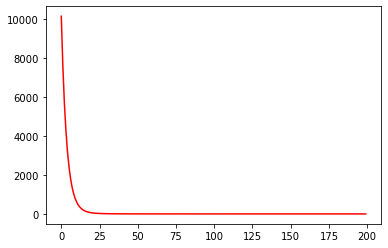

In [4]:
from matplotlib import pyplot as plt

fig = plt.figure()
x = np.linspace(0, num_iters - 1, num_iters)
plt.plot(x, history, 'r')
plt.show()